In [52]:
import pandas as pd

In [53]:
data=pd.read_csv("food_delivery_data_v2.csv")

In [54]:
data = data.drop(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Person_Experience', 'Order_Priority', 'Order_Time', 'Vehicle_Type', 'Tip_Amount'], axis=1, errors='ignore')

In [55]:
data

,Distance,Weather_Conditions,Traffic_Conditions,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost
0,9.14,Cloudy,Medium,3.9,3.1,34.4,689.38
1,19.37,Stormy,Medium,4.4,3.2,73.4,429.22
2,19.31,Clear,High,4.3,3.7,47.3,451.44
3,17.21,Clear,Medium,3.8,2.6,57.7,187.30
4,6.59,Stormy,Low,4.6,2.6,24.5,369.76
...,...,...,...,...,...,...,...
195,19.75,Clear,Medium,3.2,2.0,76.3,216.22
196,8.11,Clear,Low,4.6,4.2,17.2,529.43
197,8.04,Clear,High,2.5,4.3,22.9,354.17
198,16.44,Clear,Low,2.5,4.0,53.9,728.03


In [56]:
data['Weather_Conditions']=data['Weather_Conditions'].astype('category').cat.codes
data['Traffic_Conditions']=data['Traffic_Conditions'].astype('category').cat.codes

In [57]:
data

,Distance,Weather_Conditions,Traffic_Conditions,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost
0,9.14,1,2,3.9,3.1,34.4,689.38
1,19.37,3,2,4.4,3.2,73.4,429.22
2,19.31,0,0,4.3,3.7,47.3,451.44
3,17.21,0,2,3.8,2.6,57.7,187.30
4,6.59,3,1,4.6,2.6,24.5,369.76
...,...,...,...,...,...,...,...
195,19.75,0,2,3.2,2.0,76.3,216.22
196,8.11,0,1,4.6,4.2,17.2,529.43
197,8.04,0,0,2.5,4.3,22.9,354.17
198,16.44,0,1,2.5,4.0,53.9,728.03


In [58]:
data.corr()['Delivery_Time']


Distance              0.881056
Weather_Conditions   -0.002515
Traffic_Conditions   -0.277638
Restaurant_Rating     0.000108
Customer_Rating      -0.119954
Delivery_Time         1.000000
Order_Cost           -0.027585
Name: Delivery_Time, dtype: float64

In [59]:
data=data[['Distance','Traffic_Conditions','Delivery_Time']]

In [60]:
data

,Distance,Traffic_Conditions,Delivery_Time
0,9.14,2,34.4
1,19.37,2,73.4
2,19.31,0,47.3
3,17.21,2,57.7
4,6.59,1,24.5
...,...,...,...
195,19.75,2,76.3
196,8.11,1,17.2
197,8.04,0,22.9
198,16.44,1,53.9


In [61]:
data['speed'] = (data.iloc[:, 0] / data.iloc[:, 2]) / 60  # Calculate speed
print(data['speed'].describe())  # Get min, max, mean, median


count    200.000000
mean       0.004997
std        0.001511
min        0.000812
25%        0.004213
50%        0.004758
75%        0.005697
max        0.009403
Name: speed, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_17392\3137279128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['speed'] = (data.iloc[:, 0] / data.iloc[:, 2]) / 60  # Calculate speed


In [62]:
# if distnce<15  and time <15  fast
# if distance>15 and <20 time >45  slow
# if distance>20 and time >45  fast


def new_argument(data):
    for i in range(len(data)):    
        speed = (data.iloc[i, 0] / data.iloc[i, 2])/60   # Assuming 0th column is distance, 2nd is time
        if speed >= 0.005:
            data.loc[i, 'New_argument'] = "fast"
        elif speed < 0.3 and data.iloc[i, 1] == 3:
            data.loc[i, 'New_argument'] = "fast"
        else:
            data.loc[i, 'New_argument'] = "slow"

In [63]:
new_argument(data)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17392\164829067.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i, 'New_argument'] = "slow"


In [64]:
data

,Distance,Traffic_Conditions,Delivery_Time,speed,New_argument
0,9.14,2,34.4,0.004428,slow
1,19.37,2,73.4,0.004398,slow
2,19.31,0,47.3,0.006804,fast
3,17.21,2,57.7,0.004971,slow
4,6.59,1,24.5,0.004483,slow
...,...,...,...,...,...
195,19.75,2,76.3,0.004314,slow
196,8.11,1,17.2,0.007859,fast
197,8.04,0,22.9,0.005852,fast
198,16.44,1,53.9,0.005083,fast


In [65]:
data['New_argument'].value_counts()


New_argument
slow    120
fast     80
Name: count, dtype: int64

In [68]:
x=data.iloc[:,:3]

In [69]:
x

,Distance,Traffic_Conditions,Delivery_Time
0,9.14,2,34.4
1,19.37,2,73.4
2,19.31,0,47.3
3,17.21,2,57.7
4,6.59,1,24.5
...,...,...,...
195,19.75,2,76.3
196,8.11,1,17.2
197,8.04,0,22.9
198,16.44,1,53.9


In [70]:
y=data.iloc[:,-1]

In [71]:
y

0      slow
1      slow
2      fast
3      slow
4      slow
       ... 
195    slow
196    fast
197    fast
198    fast
199    fast
Name: New_argument, Length: 200, dtype: object

In [75]:
import numpy as np

x = np.array(x)
y = np.array(y)  # Corrected this line


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

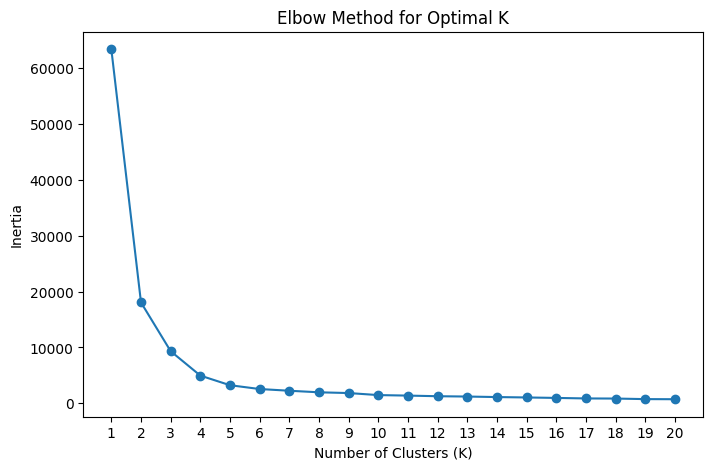

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


inertia=[]
k_range=range(1,21)

for k in k_range:
    kmeans=KMeans(n_clusters=int(k),random_state=42)
    kmeans.fit(x_train,y_train)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xticks(range(min(k_range), max(k_range) + 1))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()    

In [88]:
y_train

array(['slow', 'fast', 'slow', 'fast', 'fast', 'slow', 'slow', 'fast',
       'fast', 'slow', 'slow', 'slow', 'fast', 'slow', 'fast', 'slow',
       'slow', 'fast', 'fast', 'slow', 'fast', 'slow', 'slow', 'fast',
       'fast', 'fast', 'slow', 'fast', 'fast', 'slow', 'slow', 'slow',
       'fast', 'fast', 'fast', 'fast', 'slow', 'slow', 'fast', 'fast',
       'fast', 'slow', 'slow', 'slow', 'fast', 'slow', 'slow', 'fast',
       'slow', 'fast', 'fast', 'fast', 'slow', 'slow', 'slow', 'slow',
       'slow', 'slow', 'fast', 'slow', 'slow', 'slow', 'slow', 'fast',
       'slow', 'fast', 'slow', 'fast', 'slow', 'slow', 'fast', 'slow',
       'fast', 'slow', 'slow', 'slow', 'slow', 'slow', 'slow', 'fast',
       'fast', 'slow', 'fast', 'slow', 'slow', 'slow', 'slow', 'fast',
       'slow', 'slow', 'slow', 'fast', 'fast', 'slow', 'fast', 'fast',
       'slow', 'slow', 'slow', 'fast', 'fast', 'slow', 'slow', 'slow',
       'fast', 'slow', 'slow', 'slow', 'slow', 'fast', 'slow', 'slow',
      

In [89]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=42)

In [90]:
y_pred=kmeans.predict(x_test)

In [91]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [92]:
y_test

array(['slow', 'slow', 'fast', 'slow', 'slow', 'fast', 'fast', 'slow',
       'slow', 'slow', 'slow', 'slow', 'slow', 'fast', 'fast', 'slow',
       'slow', 'fast', 'fast', 'fast', 'slow', 'slow', 'fast', 'slow',
       'slow', 'fast', 'fast', 'slow', 'slow', 'fast', 'slow', 'slow',
       'fast', 'slow', 'slow', 'slow', 'fast', 'fast', 'slow', 'fast'],
      dtype=object)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17392\3153148222.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train ,x_train,  cmap='viridis')


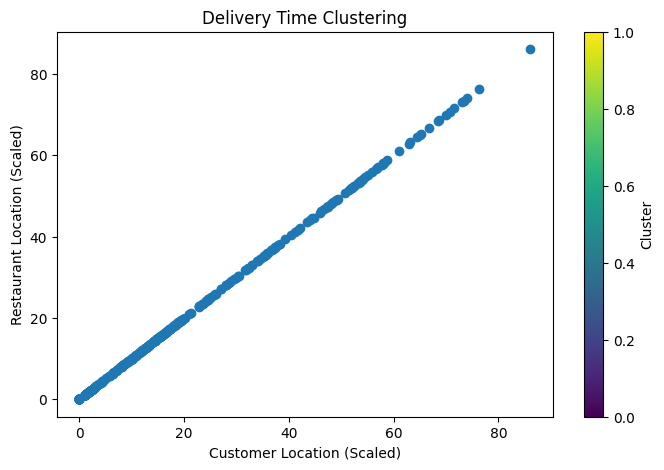

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x_train ,x_train,  cmap='viridis')
plt.xlabel("Customer Location (Scaled)")
plt.ylabel("Restaurant Location (Scaled)")
plt.title("Delivery Time Clustering")
plt.colorbar(label="Cluster")
plt.show()


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert to float32 if needed
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Ensure x_train and y_train are defined before using them
if 'x_train' in locals() and 'y_train' in locals():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Regression ke liye linear activation
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
else:
    print("Error: x_train and y_train are not defined.")


c:\Users\Asus\100DaysML\MODELS\Food_neuralnetwork\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 66.8364 - mae: 6.8521 - val_loss: 17.8127 - val_mae: 3.5474
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.1928 - mae: 2.5339 - val_loss: 0.9036 - val_mae: 0.8114
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.6397 - mae: 1.4003 - val_loss: 8.7406 - val_mae: 2.7834
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.6136 - mae: 2.7440 - val_loss: 6.0285 - val_mae: 2.3143
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.5356 - mae: 1.9501 - val_loss: 1.0032 - val_mae: 0.8427
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7369 - mae: 0.7090 - val_loss: 1.0528 - val_mae: 0.8958
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1701 - mae: 0.9275 - val_loss: 1.8142 - val_mae: 1.1610
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.5262 - mae: 1.0738 - val_loss: 1.0315 - val_mae: 0.8842
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7623 - mae: 0.7366

In [106]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")
predicted = model.predict(x_test)
print(predicted)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6725 - mae: 0.6419
Test Loss: 0.6419159173965454, Test MAE: 0.6240987181663513
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[-0.17067662]
 [ 0.70589346]
 [ 0.11900434]
 [-0.2808531 ]
 [ 0.03916739]
 [-0.03434953]
 [ 0.34098735]
 [-0.3453879 ]
 [ 0.69122964]
 [-0.4486172 ]
 [-0.4513088 ]
 [ 0.24647936]
 [ 0.681861  ]
 [ 0.14107105]
 [ 0.06734663]
 [-0.16795161]
 [-0.11613467]
 [-0.11368996]
 [-0.02987291]
 [-0.0336757 ]
 [-0.21049418]
 [-0.29165867]
 [-0.10513481]
 [-0.45705798]
 [-0.448856  ]
 [-0.21587303]
 [-0.025355  ]
 [ 0.1835297 ]
 [ 0.3187181 ]
 [ 0.41262016]
 [ 0.11780784]
 [ 0.3677329 ]
 [-0.02430907]
 [ 0.25380793]
 [ 0.62595433]
 [ 0.10825357]
 [-0.19765428]
 [-0.01262549]
 [ 0.22597587]
 [ 0.26779523]]
